In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn import metrics
from datetime import datetime, timedelta
import sweetviz as sv
import IPython
%matplotlib inline

In [2]:
# read data from csv file.
df = pd.read_csv('../data/archive/weather-sa-2017-2019-clean.csv')
# df = pd.DataFrame(data)
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [4]:
df.shape

(249023, 15)

In [5]:
# analyze_report = sv.analyze(df)
# analyze_report.show_html('analyze.html', open_browser=True)

# Cleaning Data 

In [6]:
# check for null values
df.isnull().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [7]:
# remove null values
df = df[df['humidity'].notna()]
df = df[df['barometer'].notna()]
df.isnull().sum()

Unnamed: 0    0
city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

In [8]:
# drop/remove unwanted columns
df.drop(['Unnamed: 0', 'time', 'minute'], axis =1 , inplace =True)
df.head(10)

,city,date,year,month,day,hour,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,2017,1,1,24,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,2017,1,1,1,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,2017,1,1,3,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,2017,1,1,4,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,2017,1,1,5,Clear,15,9,72%,1019.0,16
5,Qassim,1 January 2017,2017,1,1,6,Clear,13,13,82%,1019.0,16
6,Qassim,1 January 2017,2017,1,1,7,Sunny,12,7,88%,1019.0,16
7,Qassim,1 January 2017,2017,1,1,8,Sunny,14,9,72%,1021.0,16
8,Qassim,1 January 2017,2017,1,1,9,Sunny,15,9,72%,1021.0,7
9,Qassim,1 January 2017,2017,1,1,10,Sunny,17,7,64%,1021.0,9


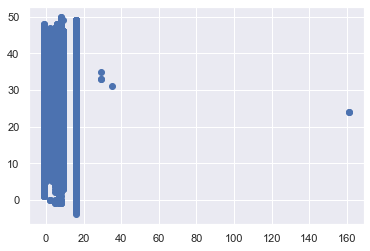

In [9]:
# we can see here the outlier value is approximately 160. So we decided to drop it.
plt.scatter(df.visibility, df.temp)

In [10]:
# drop outliers
df = df[df['visibility']<=40]
df = df[df['wind']<100]

In [11]:
# changing the dtype of humidity to int
df['humidity'] = df['humidity'].str.replace('%', '')
df['humidity'] = df['humidity'].astype(int)

# Change Northen Boarder to NB
df['city'] = df['city'].str.replace('Northern boarder', 'NB')


In [12]:
# recheck dtype of humidity
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248942 entries, 0 to 249022
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city        248942 non-null  object 
 1   date        248942 non-null  object 
 2   year        248942 non-null  int64  
 3   month       248942 non-null  int64  
 4   day         248942 non-null  int64  
 5   hour        248942 non-null  int64  
 6   weather     248942 non-null  object 
 7   temp        248942 non-null  int64  
 8   wind        248942 non-null  int64  
 9   humidity    248942 non-null  int32  
 10  barometer   248942 non-null  float64
 11  visibility  248942 non-null  int64  
dtypes: float64(1), int32(1), int64(7), object(3)
memory usage: 23.7+ MB


In [13]:
df[df['city']=='NB']

,city,date,year,month,day,hour,weather,temp,wind,humidity,barometer,visibility
148801,NB,1 January 2017,2017,1,1,24,Clear,12,4,58,1020.0,16
148802,NB,1 January 2017,2017,1,1,1,Clear,11,7,67,1020.0,16
148803,NB,1 January 2017,2017,1,1,2,Clear,11,4,62,1020.0,16
148804,NB,1 January 2017,2017,1,1,3,Clear,11,6,62,1020.0,16
148805,NB,1 January 2017,2017,1,1,4,Clear,11,4,62,1020.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
169031,NB,30 April 2019,2019,4,30,19,Clear,33,17,17,1011.0,16
169032,NB,30 April 2019,2019,4,30,20,Clear,31,13,19,1011.0,16
169033,NB,30 April 2019,2019,4,30,21,Clear,31,13,16,1013.0,16
169034,NB,30 April 2019,2019,4,30,22,Clear,29,28,18,1013.0,16


# Data Visualzation

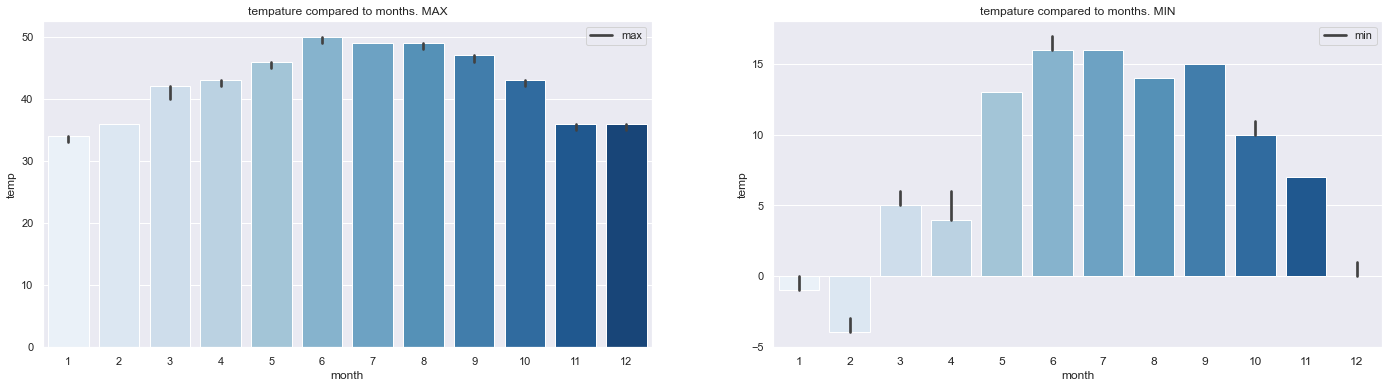

In [14]:
plt.figure(figsize=[24,6])

# first - MAX
plt.subplot(1,2,1)
sns.barplot(data=df, x='month', y='temp', estimator=np.max, palette='Blues')
plt.title('tempature compared to months. MAX')
plt.legend(['max'])

# second - MIN
plt.subplot(1,2,2)
plt.title('tempature compared to months. MIN')
sns.barplot(data=df, x='month', y='temp', estimator=np.min, palette='Blues')
plt.xticks(fontsize=12)
plt.legend(['min'])


plt.show()

In [15]:
temp = df['temp']
# max_temp = temp.max()
# min_temp = temp.min()
print('max temp: ', temp.max())
print('min temp: ', temp.min())

max temp:  50
min temp:  -4


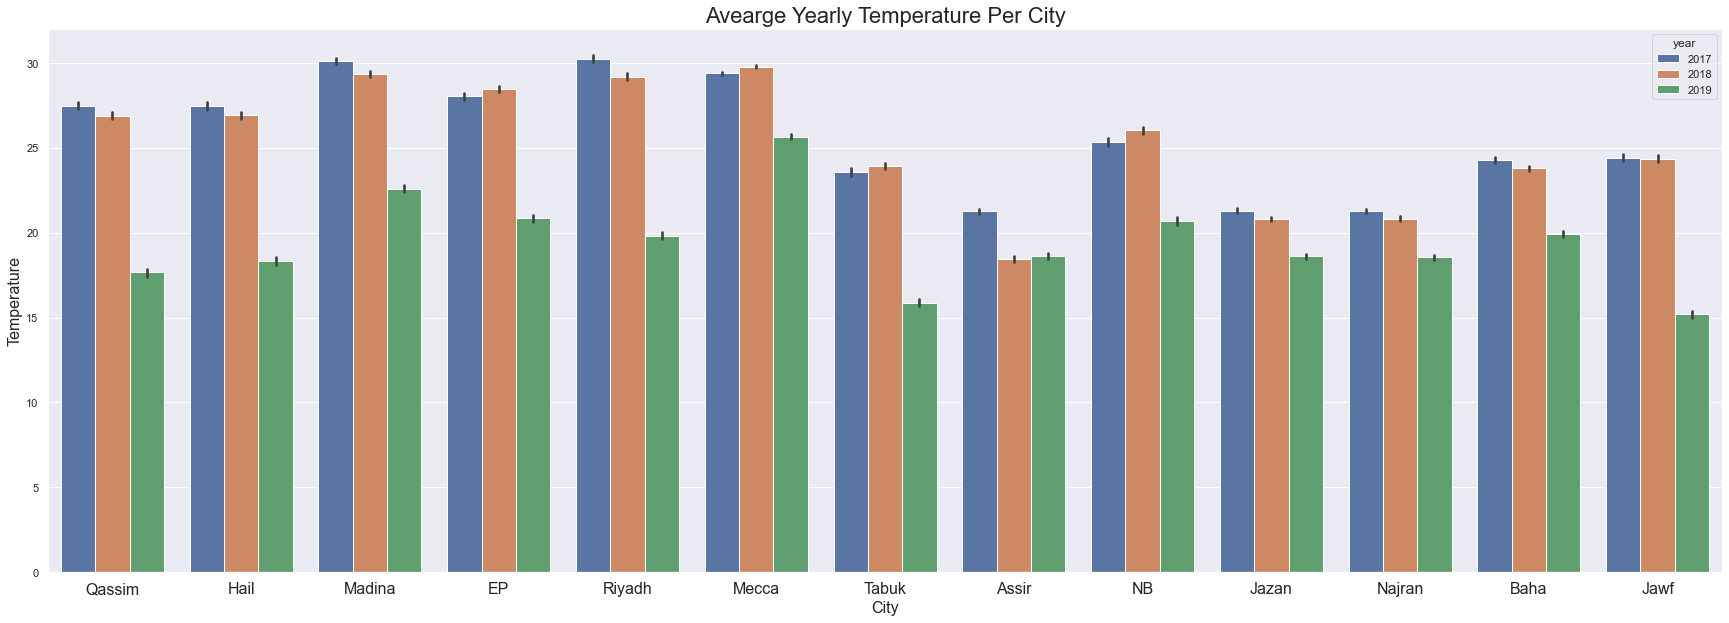

In [16]:
plt.figure(figsize=[30,10])
plt.title('Avearge Yearly Temperature Per City', fontsize=22)
sns.barplot(data=df, x='city', y='temp', hue='year', estimator=np.mean)
plt.ylabel('Temperature', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.xticks(fontsize=16)
plt.show()

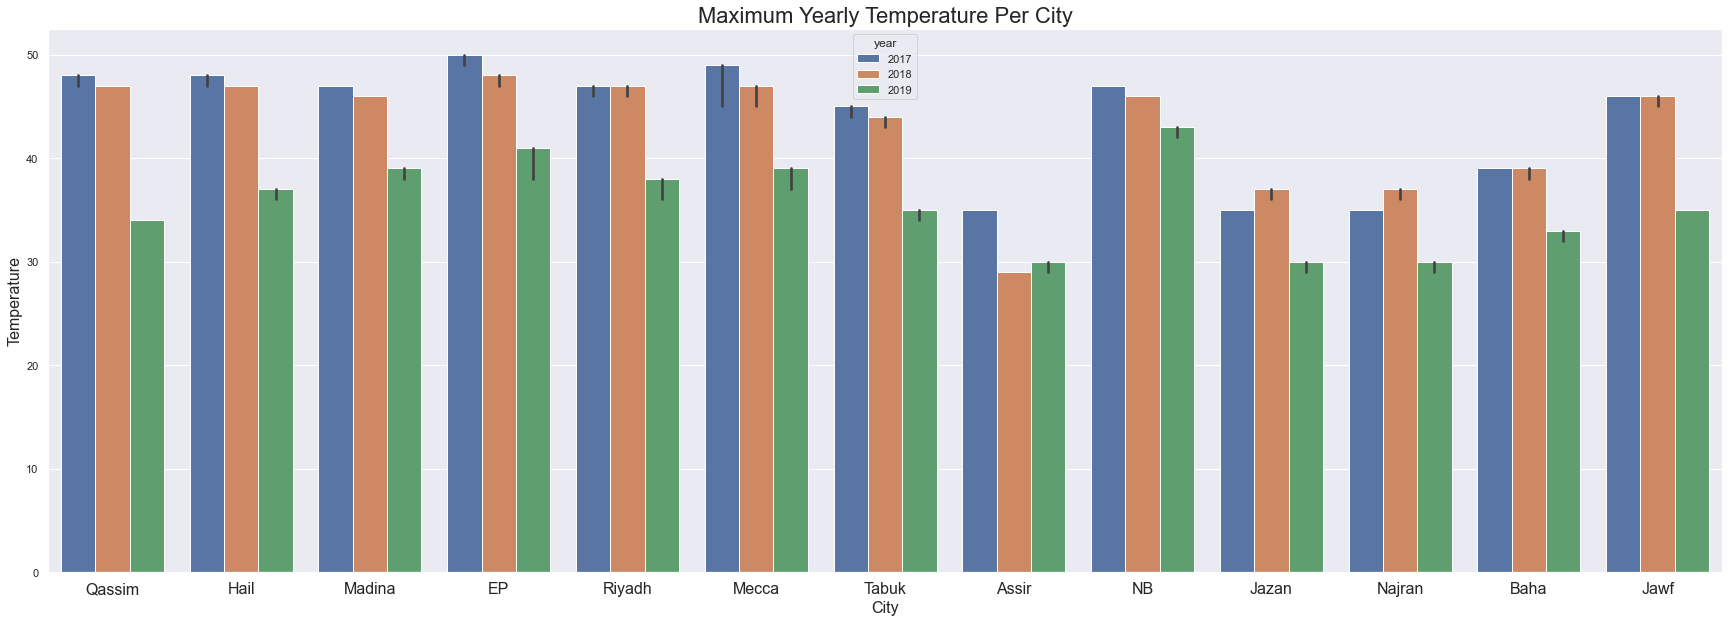

In [17]:
plt.figure(figsize=[30,10])
plt.title('Maximum Yearly Temperature Per City', fontsize=22)
sns.barplot(data=df, x='city', y='temp', hue='year', estimator=np.max)
plt.ylabel('Temperature', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.xticks(fontsize=16)
plt.show()

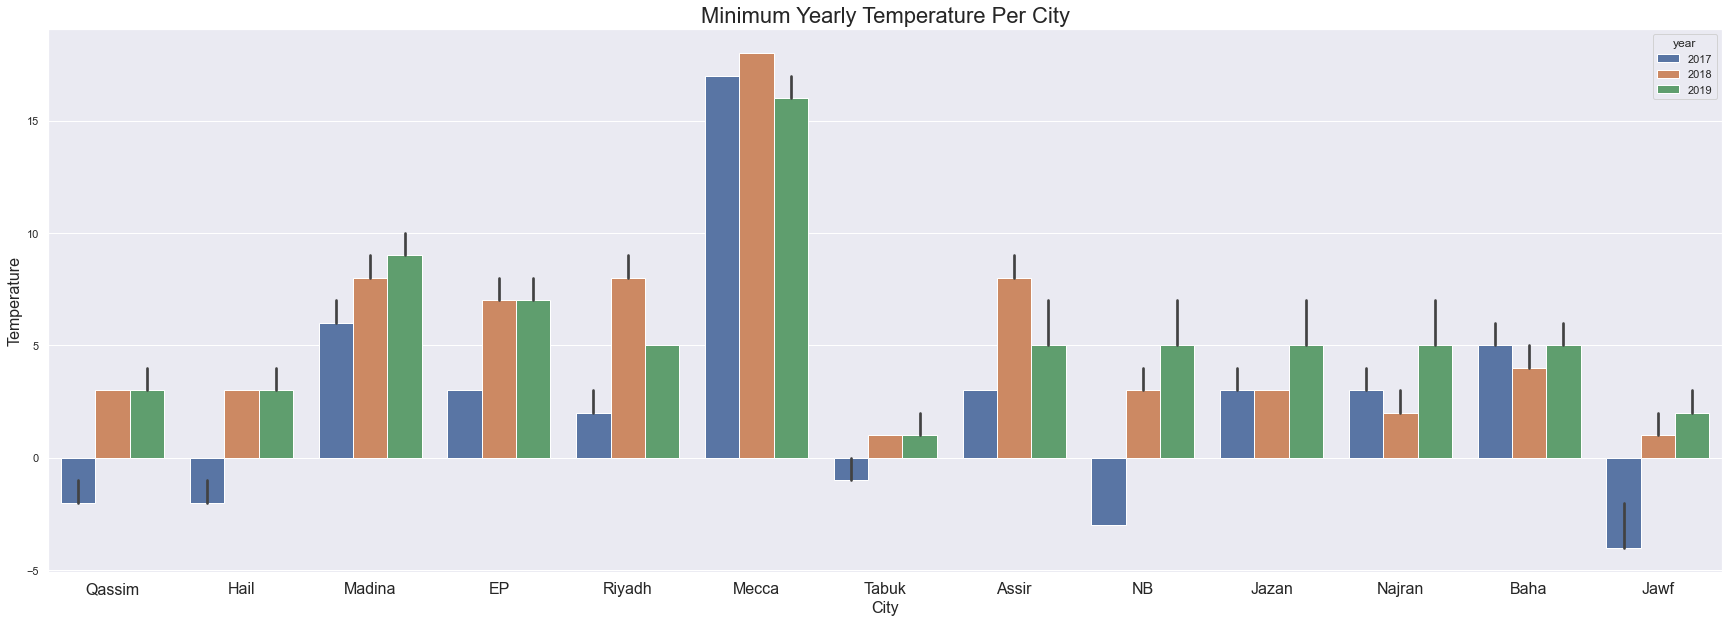

In [18]:
plt.figure(figsize=[30,10])
plt.title('Minimum Yearly Temperature Per City', fontsize=22)
sns.barplot(data=df, x='city', y='temp', hue='year', estimator=np.min)
plt.ylabel('Temperature', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# - Model Building: training and testing

In [19]:
# define df_train as independent and df_target as dependent
df_train = df[['visibility', 'barometer', 'wind', 'humidity']]
df_target = df['temp']

In [20]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=.30)

In [21]:
# print("coef: ", df_model.coef_),
# print("intercept: ", df_model.intercept_)

In [22]:
# define and train and the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state =20)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=20)

In [23]:
model.score(X_test, y_test)

0.7518852333287992

In [24]:
y_pred= model.predict(X_test)